<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository)**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [4]:
#To find the number of men and women

#Lets to check if the labels are always Male/Female or something like m/f or 0/1 is present
#data['sex'].unique()
#So we can be sure of the count

#No of Male
print(f"No fo Male : {data[data['sex']=='Male']['sex'].count()}")
#No of Female
print(f"No fo Female : {data[data['sex']=='Female']['sex'].count()}")

No fo Male : 21790
No fo Female : 10771


**2. What is the average age (*age* feature) of women?**

In [5]:
#Now let's find the average age of women
print(f"Average age of women: {data[data['sex']=='Female']['age'].mean()}")

Average age of women: 36.85823043357163


**3. What is the percentage of German citizens (*native-country* feature)?**

In [6]:
#let's check the countries
#print(data['native-country'].unique())

#percentage of german citizen
ger_count = data[data['native-country']=='Germany']['native-country'].count()
tot_count = data['native-country'].count()
ger_per = (ger_count/tot_count)*100
print(f"Percentage of German citizens : {ger_per}")

Percentage of German citizens : 0.42074874850281013


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [7]:
#data['salary'].unique()
#mean and stdd of age for who earn more than 50k
filter_more_50k = data[data['salary']=='>50K']['age']
mean_filter_more_50k = filter_more_50k.mean()
std_filter_more_50k = filter_more_50k.std()

#mean and stdd of age for who earn less than 50k
filter_less_50k = data[data['salary']=='<=50K']['age']
mean_filter_less_50k = filter_less_50k.mean()
std_filter_less_50k = filter_less_50k.std()

print(f"For salary less than 50k mean : {mean_filter_less_50k} and std deviation : {std_filter_less_50k}")
print(f"For salary more than 50k mean : {mean_filter_more_50k} and std deviation : {std_filter_more_50k}")

For salary less than 50k mean : 36.78373786407767 and std deviation : 14.020088490824813
For salary more than 50k mean : 44.24984058155847 and std deviation : 10.51902771985177


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64


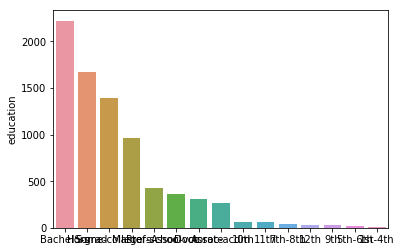

In [8]:
#Seems like any interesting insight let's check it out
filter_salary_more_50k = data[data['salary'] == '>50K']
edu_more_50k = filter_salary_more_50k['education']
print(edu_more_50k.value_counts())

sns.barplot(x=edu_more_50k.value_counts().index,y=edu_more_50k.value_counts())

From the visual plot and count result we can see a trend like:

* People with more than high school education has higher chances of landing a 50k+ salary
* People with less than high school has also managed to land high paying jobs but far less
* So the above condition is false ie min high school is not a criteria for landing high profile job (But very hard to get one)

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [17]:
#Let's find the max age of Eskimo race
#data['race'].unique()

desc_df = data['age'].groupby([data['race'],data['sex']]).describe()
desc_df

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [18]:
print(f"Max age of Amer-Indian-Eskimo : {desc_df['max'].get(key = ('Amer-Indian-Eskimo','Male'))}")

Max age of Amer-Indian-Eskimo : 82.0


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

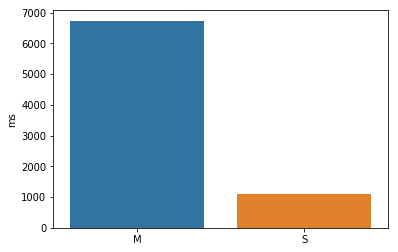

In [11]:
data['marital-status'].unique()
data['ms'] = data['marital-status'].apply(lambda x:'M' if x.startswith('Married') else 'S')

sns.barplot(x=data[data['salary']=='>50K']['ms'].value_counts().index,y=data[data['salary']=='>50K']['ms'].value_counts())

From the bar chart we can clearly see that married people tend to a earn a lot greater 
(cause they have to spend a lot :p)

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [12]:
# person who work hte most
max_hours = data['hours-per-week'].max()

#people who works the most and earns more than 50K
per_most_work_more_50K = data[(data['hours-per-week'] == max_hours) & (data['salary'] == '>50K')].count()[0]
tot_per = data.shape[0]
per_worker = (per_most_work_more_50K/tot_per)*100
per_worker

0.076778968704892356

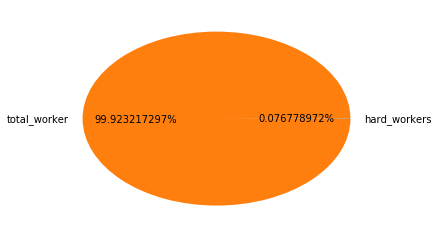

In [15]:
work = ['hard_workers','total_worker']
hours = [per_worker,100-per_worker]
plt.pie(hours, labels = work,autopct='%1.9f%%')
plt.show()

Only 25 person out of 32561 is working 99 hours a day and making 50k+

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [16]:
avg_hrs_native = data['hours-per-week'].groupby(data['native-country']).mean()
print(f"Japan average hours per week : {avg_hrs_native.get(key='Japan')}")

Japan average hours per week : 43.693548387096776


### Thanks